# Faulty Steel Plate Classification
The goal of this document is to describe the approach used to analyse the dataset related to the Steel Plates Faults

![title]('downloads.jpg')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
data=pd.read_csv("faults.csv")

# Analyzing Data

In [4]:
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [5]:
data.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
label_columns=data.columns.values[:7:]
targets=(data.iloc[:,-7:]==1).idxmax(1)
dataset=data.drop(label_columns,axis=1)
dataset['target']=targets


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sum_of_Luminosity      1941 non-null   int64  
 1   Minimum_of_Luminosity  1941 non-null   int64  
 2   Maximum_of_Luminosity  1941 non-null   int64  
 3   Length_of_Conveyer     1941 non-null   int64  
 4   TypeOfSteel_A300       1941 non-null   int64  
 5   TypeOfSteel_A400       1941 non-null   int64  
 6   Steel_Plate_Thickness  1941 non-null   int64  
 7   Edges_Index            1941 non-null   float64
 8   Empty_Index            1941 non-null   float64
 9   Square_Index           1941 non-null   float64
 10  Outside_X_Index        1941 non-null   float64
 11  Edges_X_Index          1941 non-null   float64
 12  Edges_Y_Index          1941 non-null   float64
 13  Outside_Global_Index   1941 non-null   float64
 14  LogOfAreas             1941 non-null   float64
 15  Log_

In [8]:
dataset.head()

,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,target
0,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,...,-0.2913,0.5822,1,0,0,0,0,0,0,Pastry
1,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,...,-0.1756,0.2984,1,0,0,0,0,0,0,Pastry
2,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,...,-0.1228,0.2150,1,0,0,0,0,0,0,Pastry
3,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,...,-0.1568,0.5212,1,0,0,0,0,0,0,Pastry
4,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,...,-0.1992,1.0000,1,0,0,0,0,0,0,Pastry


In [37]:
dataset.target.value_counts()


Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

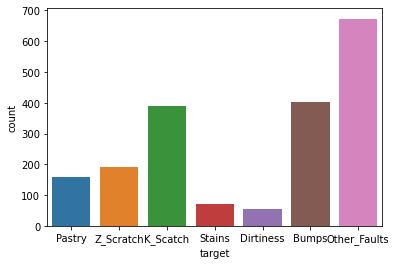

In [38]:
sns.countplot(x="target", data=dataset)

In [25]:
corr=dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
Sum_of_Luminosity,1.000000,-0.540566,0.136515,-0.169331,-0.263632,-0.204812,-0.301452,0.293691,0.049607,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248,-0.084307,-0.099592,0.616950,-0.078111,-0.055272,-0.179831,-0.205890
Minimum_of_Luminosity,-0.540566,1.000000,0.429605,-0.023579,0.042048,0.103393,0.358915,-0.044111,0.066748,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797,-0.074697,0.049905,-0.461000,0.183327,0.092765,0.078690,0.228112
Maximum_of_Luminosity,0.136515,0.429605,1.000000,-0.098009,-0.216339,-0.128397,0.149675,0.031425,0.065517,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651,-0.058742,-0.189441,0.185897,0.090456,0.022157,-0.047549,-0.007784
Length_of_Conveyer,-0.169331,-0.023579,-0.098009,1.000000,0.378542,0.214769,0.135152,-0.230601,0.073694,-0.217417,0.123585,0.235732,0.128663,-0.193247,-0.219973,-0.157057,0.120715,-0.149769,-0.197543,0.196209,-0.230856,-0.261071,-0.136839,-0.052603,0.225504,0.132091
TypeOfSteel_A300,-0.263632,0.042048,-0.216339,0.378542,1.000000,0.125649,0.112140,-0.091954,0.164156,-0.244765,0.173836,0.240634,0.022142,-0.329614,-0.266955,-0.311796,0.010630,-0.252818,-0.308910,-0.054792,0.339488,-0.407730,-0.154796,-0.082489,0.306385,-0.007530
Steel_Plate_Thickness,-0.204812,0.103393,-0.128397,0.214769,0.125649,1.000000,0.063449,0.012526,-0.124382,-0.228352,-0.077408,0.251985,0.221244,-0.176639,-0.252822,-0.037287,0.274097,-0.116499,-0.085159,0.076579,-0.024876,-0.351654,-0.099945,0.017727,-0.016773,0.315671
Edges_Index,-0.301452,0.358915,0.149675,0.135152,0.112140,0.063449,1.000000,-0.180739,0.149498,-0.296510,0.250178,0.285302,0.008282,-0.408619,-0.355853,-0.371989,0.020548,0.207516,-0.330006,-0.029915,-0.152730,-0.337701,0.165732,0.103517,0.232000,0.097698
Empty_Index,0.293691,-0.044111,0.031425,-0.230601,-0.091954,0.012526,-0.180739,1.000000,-0.076439,0.334996,-0.389342,-0.459800,-0.165293,0.356685,0.448864,0.397289,-0.139420,0.061608,0.481738,-0.184993,0.129672,0.156711,-0.010243,-0.012514,-0.172147,0.048267
Square_Index,0.049607,0.066748,0.065517,0.073694,0.164156,-0.124382,0.149498,-0.076439,1.000000,-0.113627,0.242779,0.081488,-0.069913,-0.189340,-0.082846,-0.257661,-0.162034,0.111977,-0.292251,-0.242923,-0.005543,0.059175,0.097310,-0.214369,0.261385,-0.093296
Outside_X_Index,0.658339,-0.487574,0.099300,-0.217417,-0.244765,-0.228352,-0.296510,0.334996,-0.113627,1.000000,-0.076663,-0.689867,-0.337173,0.710837,0.820223,0.464860,-0.440358,-0.035721,0.518910,-0.132081,-0.109354,0.631370,-0.093722,-0.074105,-0.185729,-0.166709


<AxesSubplot:ylabel='target'>

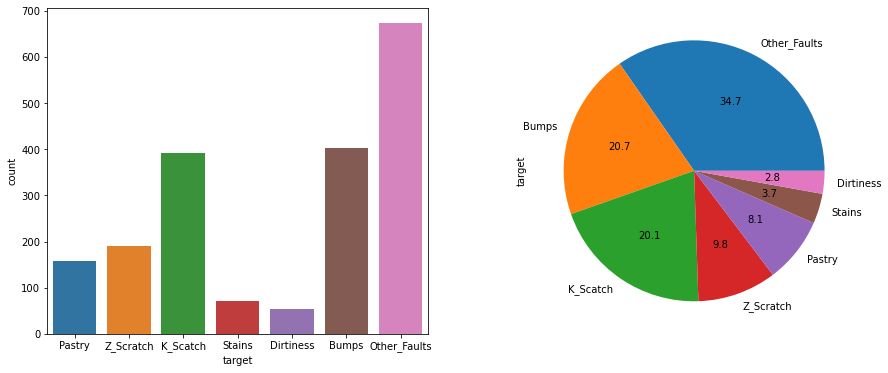

In [10]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='target',data=dataset,ax=ax[0])
dataset['target'].value_counts().plot.pie(autopct='%1.1f',ax=ax[1])

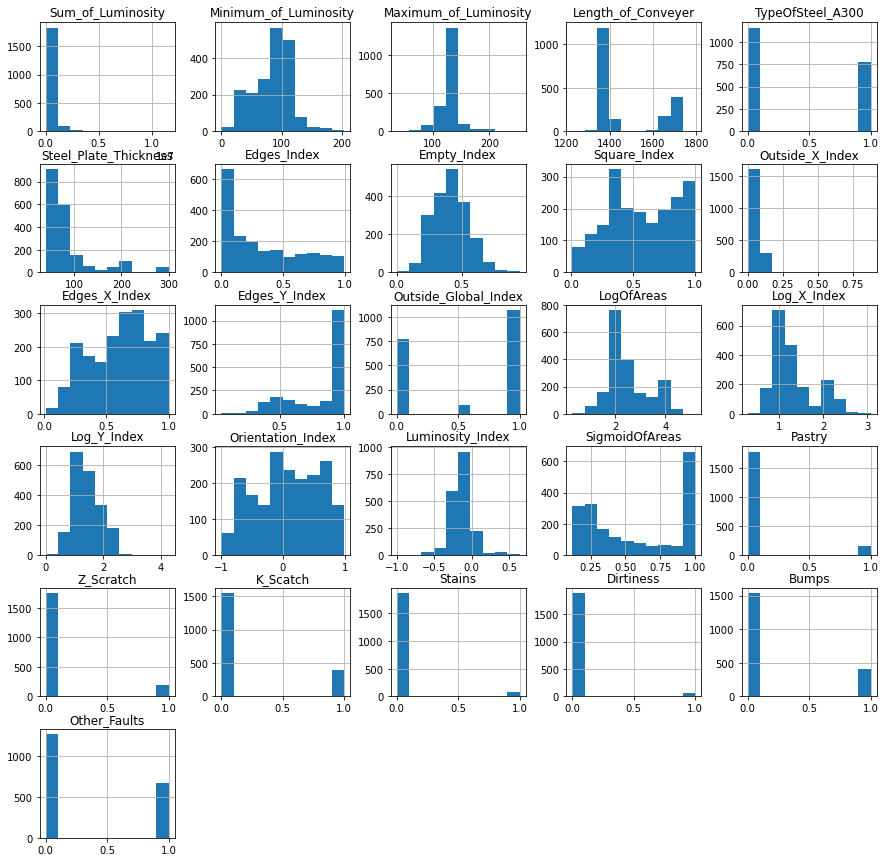

In [26]:
dataset.hist(figsize=(15,15))
plt.show()

<AxesSubplot:>

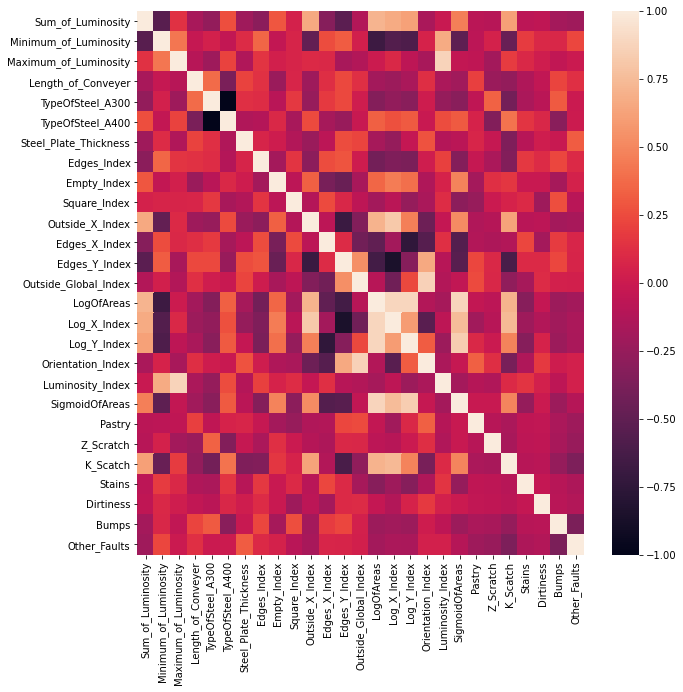

In [11]:
corr=dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [12]:
dataset=dataset.drop('TypeOfSteel_A400',axis=1)
dataset.head()

,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,target
0,24220,76,108,1687,1,80,0.0498,0.2415,0.1818,0.0047,...,-0.2913,0.5822,1,0,0,0,0,0,0,Pastry
1,11397,84,123,1687,1,80,0.7647,0.3793,0.2069,0.0036,...,-0.1756,0.2984,1,0,0,0,0,0,0,Pastry
2,7972,99,125,1623,1,100,0.9710,0.3426,0.3333,0.0037,...,-0.1228,0.2150,1,0,0,0,0,0,0,Pastry
3,18996,99,126,1353,0,290,0.7287,0.4413,0.1556,0.0052,...,-0.1568,0.5212,1,0,0,0,0,0,0,Pastry
4,246930,37,126,1353,0,185,0.0695,0.4486,0.0662,0.0126,...,-0.1992,1.0000,1,0,0,0,0,0,0,Pastry


# Implementation of K-Nearest Neighbor Classifier
In general k is called a hyperparameter and we need to choose the K that gives best performace.

Here K is ranged from 1 to 27(excluded) and accuracy is found for each K value.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x,y = dataset.loc[:,dataset.columns != 'target'], dataset.loc[:,'target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42,shuffle=True)
# Model complexity
neig = np.arange(1, 27)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 27(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

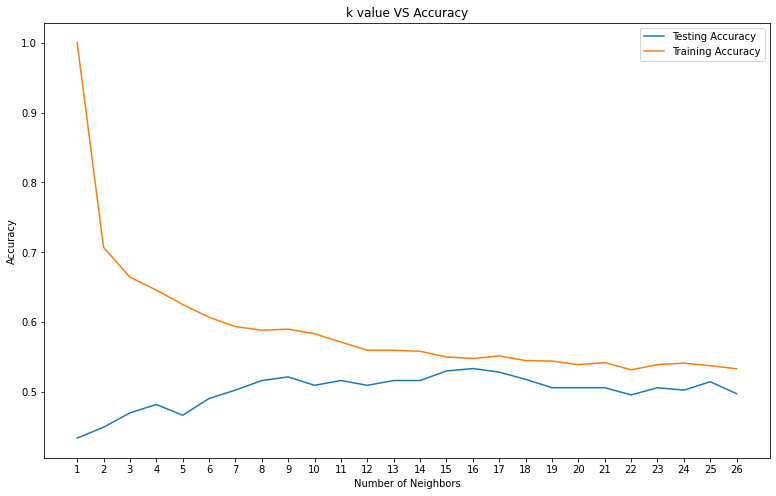

Best accuracy is 0.5334476843910806 with K = 16


In [41]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# Model complexity
K is 16 which is small. Therefore, model is a complex model that can lead to overfitting. It means that model memozizes the trainning sets and cannot predict test set with good accuracy.
If k is big, model that is less complex model can lead to underfit. (Not the case here)
As you can see in plot, when K is 1 it memozize train sets and cannot give good accuracy on test set (overfit). Also if K is 16, model is leading to overfitting. Again, accuracy is not enough as it looks like the model is just guessing the test dataset even when K=16 is the best performance it gives.


Since the dataset is sparse and the error varies extremely i.e Other_Faults is at 673 and Dirtiness is at 55, it is better to try to get a better accuracy after stratifying the trainning dataset sample and checking the best performance.

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size = 0.3,random_state = 42,shuffle=True)
# Model complexity
neig = np.arange(1, 27)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 27(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))


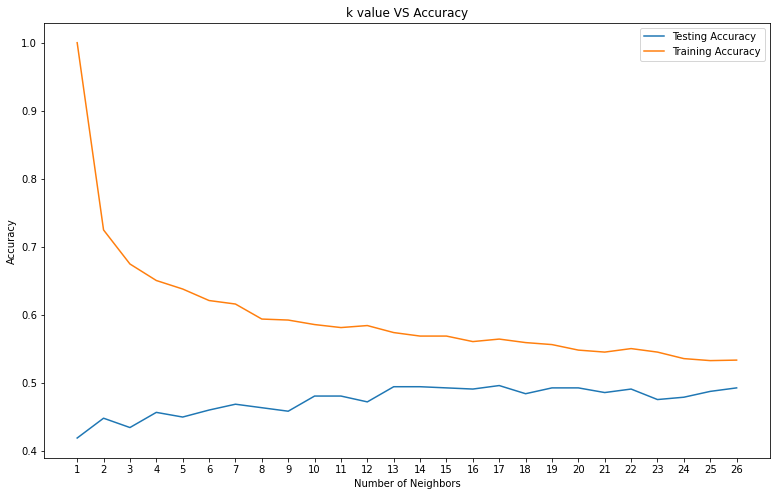

Best accuracy is 0.4957118353344768 with K = 17


In [43]:
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Again, we can see that K has improved just by little but still the model is overfitting 
Moving on to Random Forest Classifier

In [44]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size = 0.3,random_state = 42)
trees = np.arange(1, 50)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(trees):
    # k from 1 to 27(exclude)
    rf = RandomForestClassifier(random_state = 42, n_estimators=k, min_samples_split=2)
    # Fit with rf
    rf.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(rf.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(rf.score(x_test, y_test))


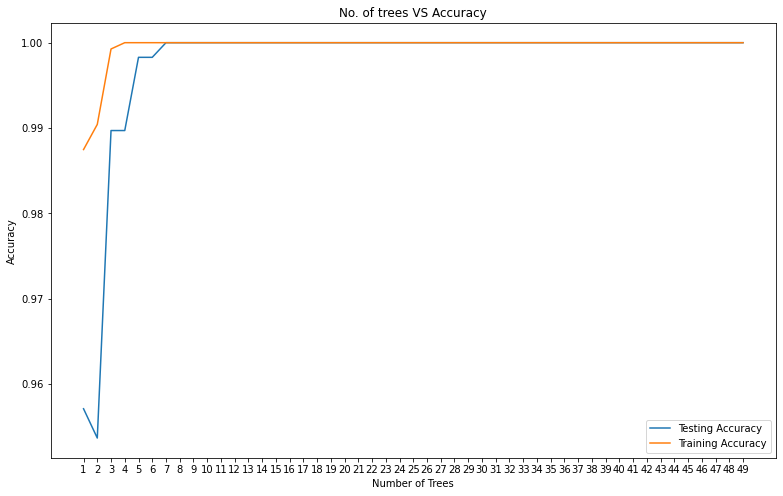

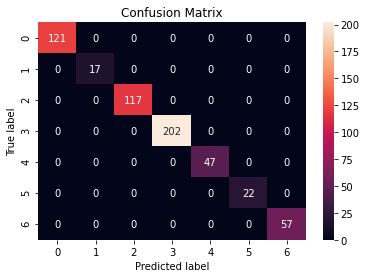

Classification report: 
               precision    recall  f1-score   support

       Bumps       1.00      1.00      1.00       121
   Dirtiness       1.00      1.00      1.00        17
    K_Scatch       1.00      1.00      1.00       117
Other_Faults       1.00      1.00      1.00       202
      Pastry       1.00      1.00      1.00        47
      Stains       1.00      1.00      1.00        22
   Z_Scratch       1.00      1.00      1.00        57

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

Best accuracy is 1.0 with No. of trees = 7


In [46]:
plt.figure(figsize=[13,8])
plt.plot(trees, test_accuracy, label = 'Testing Accuracy')
plt.plot(trees, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('No. of trees VS Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(trees)
plt.show()

rf = RandomForestClassifier(random_state = 42, n_estimators=48, min_samples_split=2)
y_pred = rf.fit(x_train,y_train).predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('Classification report: \n',classification_report(y_test,y_pred))
print("Best accuracy is {} with No. of trees = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Hence we can see that random Forest Regression is best model for fauty plate Classification